# Iris Flower Classification
Objective: Using the iris dataset, code and classifier using the Logistic Regression algorithm for the three types of flowers: Iris-Setosa, iris-versicolor and iris-virginica.

In [17]:
# Read data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./Iris.csv')

## Analyzing the data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


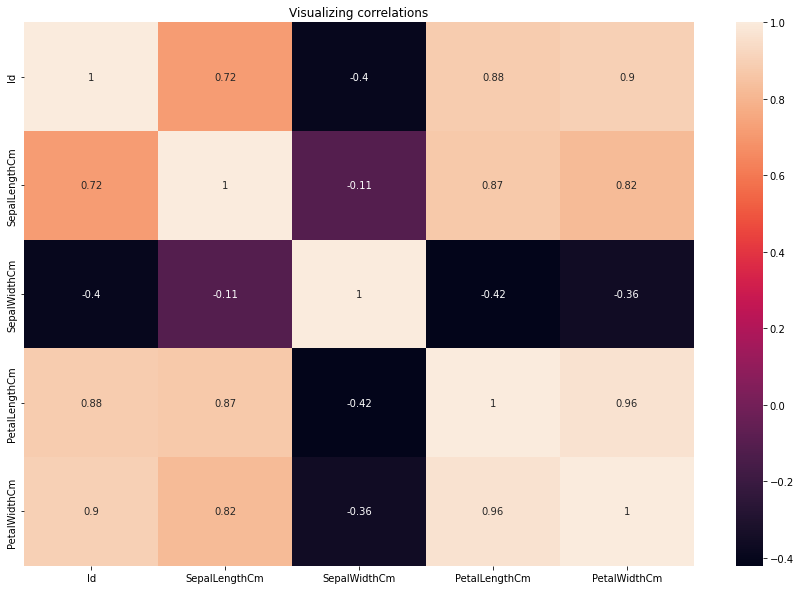

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Visualizing correlations')
plt.show()

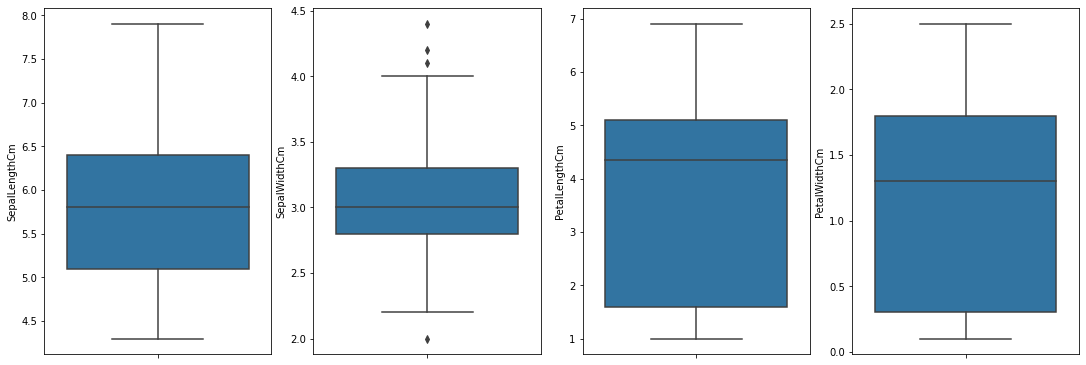

In [55]:
%matplotlib inline
fig, ax = plt.subplots(nrows= 1, ncols=4, figsize=(15, 5))
index = 0
ax = ax.flatten()

for key, value in df.items():
    if key not in ('Id', 'Species'):
        sns.boxplot(y=key, data=df, ax=ax[index])
        index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [22]:
# Preprocessing data
# Before all, I will separate the target and the data
X, y = df.drop(['Species', 'Id'], axis=1), df.Species

In [23]:
# Because I will use the logistic regression model, it is necessary to normalize the data.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

## Generate test and training set (30-70, 50-50 and 70-30).

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score 

In [25]:
"""Training the model with 70% of the data."""
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print(f'The score using 70% of the data for training is {log_reg.score(X_test, y_test) * 100}')

The score using 70% of the data for training is 97.77777777777777


In [26]:
"""Training the model with 70% of the data."""
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, train_size=0.5, random_state=1)
log_reg_50 = LogisticRegression()
log_reg_50.fit(X_train_50, y_train_50)

print(f'The score using 70% of the data for training is {log_reg_50.score(X_test_50, y_test_50) * 100}')


The score using 70% of the data for training is 97.33333333333334


In [27]:
"""Training the model with 70% of the data."""
X_train_30, X_test_70, y_train_30, y_test_70 = train_test_split(X, y, train_size=0.3, random_state=101)
log_reg_30 = LogisticRegression()
log_reg_30.fit(X_train_30, y_train_30)

print(f'The score using 70% of the data for training is {log_reg_30.score(X_test_70, y_test_70) * 100}')


The score using 70% of the data for training is 93.33333333333333


As we can see, the model that was trained with the 70% of the data was the most accurate. So, in the following test, I will use the 70% of the data in the training phase.

## Try the classifier with only one of the variables.

In [28]:
#I'm separate the keys for better readability
keys = df.keys()
keys = keys.drop('Id')
keys = keys.drop('Species')


In [43]:
from itertools import combinations
def training_comb(df, keys, n, penalty='l2', solver='lbfgs', l1_ratio=None) -> list:
    """Generate a logistic regression model and train it with the possibles combinations of the passed keys.

    Args:
        df (Pandas.DataFrame): The dataframe to extract the data.
        keys (List[String]): The list of the keys to combine.
        n (int): The number of elements to combine.

    Returns:
        list: Returns a list of tuples containing the name of the keys and the score.
    """
    scores = []
    
    for key in combinations(keys, n):    
    #Separate our feature from the dataset
        X = df[list(key)]
        
        #Mix the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101)

        #Create the model
        log_reg = LogisticRegression(penalty=penalty, solver=solver, l1_ratio=l1_ratio)
        
        #Train the model
        log_reg.fit(X_train, y_train)
        
        #Appending the results to our scores list
        scores.append((key, log_reg.score(X_test, y_test)))
        
    return scores
    

In [37]:
scores = training_comb(df, keys, 1)
for key, score in scores:
    print(f'Score using {key}: {score*100}%')

Score using ('SepalLengthCm',): 71.11111111111111%
Score using ('SepalWidthCm',): 60.0%
Score using ('PetalLengthCm',): 97.77777777777777%
Score using ('PetalWidthCm',): 93.33333333333333%


As we can see, the two features that obtains better scores are the pental length and the petal width. This demostrate that the size of the petal is relationed with the specie.

## Try the classifier using all the combinations of the features

### Using three features

In [31]:
scores = training_comb(df, keys, 2)
for key, score in scores:
    print(f'Score using {key}: {score*100}%')


Score using ('SepalLengthCm', 'SepalWidthCm'): 77.77777777777779%
Score using ('SepalLengthCm', 'PetalLengthCm'): 97.77777777777777%
Score using ('SepalLengthCm', 'PetalWidthCm'): 95.55555555555556%
Score using ('SepalWidthCm', 'PetalLengthCm'): 97.77777777777777%
Score using ('SepalWidthCm', 'PetalWidthCm'): 93.33333333333333%
Score using ('PetalLengthCm', 'PetalWidthCm'): 97.77777777777777%


### Using three features

In [32]:
scores = training_comb(df, keys, 3)
for key, score in scores:
    print(f'Score using {key}: {score*100}%')

Score using ('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'): 97.77777777777777%
Score using ('SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm'): 95.55555555555556%
Score using ('SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'): 97.77777777777777%
Score using ('SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'): 97.77777777777777%


As we can expect, using the petal size features will return better results than using the sepal size, reaching a 97% of accuracy. However, using only the length of the petal returns the same accuracy than using all the features. For that reason, we can conclude that the petal length is the most important feature, and maybe the only necessary feature.

## Try the classifier with all the penalities methods and without them.

In [49]:
penalties = [
    ('l2', 'lbfgs', None), 
    ('l1', 'saga', None), 
    ('elasticnet', 'saga', 0.5), 
    ('none', 'lbfgs', None)
]

for penalty, solver, l1_ratio in penalties:
    key, score = training_comb(df, keys, 4, penalty=penalty, solver=solver, l1_ratio=l1_ratio)[0]
    
    print(f'Score using {penalty}: {score * 100}%')

Score using l2: 97.77777777777777%
Score using l1: 100.0%
Score using elasticnet: 100.0%
Score using none: 100.0%


d:\iteso\machine-learning\workspace\venv\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\iteso\machine-learning\workspace\venv\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
